# Correlación entre el porcentaje de crecimiento de la población y el porcentaje de crecimiento de las áreas urbanas en los municipios de Oaxaca. Estudio de caso segun los datos del censo nacional de población y vivienda de 2010 y 2020.

### 1. Introducción

Este trabajo busca averiguar a través de un estudio de caso si el aumento en la población tiene una relación con el cambio en el área urbana en los municipios del estado de Oaxaca comparando los datos del censo nacional de población y vivienda de 2010 y 2020 y sus marcos geo-estadísticos correspondientes, con el fin de llegar a crear un modelo estadístico que sintetice esta información.

Según datos de la CONAPO (2020) la tasa de crecimiento natural de México en 2020 es de 1.08%, y esta tendencia positiva se ha mantenido durante la historia contemporánea del país. Esto nos lleva a preguntarnos qué otras variables podrían estar relacionadas a este crecimiento poblacional, es decir, qué otros fenómenos podemos llegar a explicar a través del crecimiento de la población.

Por otro lado, el crecimiento del área urbana en México es una de las variables que ha estado siempre relacionada al aumento poblacional, puesto que durante las pasadas décadas el país ha sufrido una transformación estructural que movilizó a muchas poblaciones rurales a las ciudades por todo el territorio nacional. El abandono del campo y la crisis del mundo rural en México son temas relevantes en el panorama actual del país. Según datos del Banco Mundial (2019), el crecimiento de la población urbana en 2019 en México fue de 1.45% y aunque ha ido en decremento con respecto a décadas anteriores se mantiene en números positivos.

Estos dos datos nos dan ya un buen número de posibles preguntas, pero en concreto mi interés está en saber si el crecimiento del área urbana depende del crecimiento de la población.

#### 1.1. Hipótesis

Por lo explicado anteriormente, mi hipótesis es que existe una correlación lineal entre el crecimiento de la población y el cambio en el área urbana. Donde la variable independiente es el crecimiento poblacional y la variable independientes es el cambio en el area urbana.

#### 1.2. Objetivos y preguntas de investigación

El objetivo de este trabajo es aplicar los conocimientos obtenidos durante curso de Métodos Cuantitativos de la UAM-I, a un caso de estudio concreto y real -el de el Estado de Oaxaca- que permita reforzar el conocimiento adquirido y demostrar la capacidad de diseño y realización de un ejercicio de investigación.

En este trabajo aplicaremos estos temas a un ejercicio que intenta responder las siguientes preguntas: ¿Qué relación existe entre el crecimiento de la población y el crecimiento del área urbana? ¿Existe una correlación lineal entre estas dos variables? Y sí existiera esta relación ¿Podemos crear un modelo que prediga el cambio?

#### 1.3. Metodología

Para determinar si esta correlación existe o no haremos uso de herramientas estadísticas y geográficas que nos permitan explorar nuestros datos y hacer los cálculos correspondientes.

El trabajo constará de diversas fases que nos llevarán a la comprobación de la hipótesis:

* Obtención de los datos de la página oficial de INEGI.

* Creación de la muestra a partir de los datos de nuestro caso de estudio.

* Análisis exploratorio de los datos extraídos de las fuentes oficiales.

* Construcción del DataFrame con los datos necesarios para comprobar si hay correlación entre variables

* Transformación de ambas variables en porcentajes calculando el cambio con respecto al 2010 usando los nuevos datos de 2020

* Análisis exploratorio del nuevo DataFrame.

* Cálculo del coeficiente de correlación de Pearson entre ambas variables.

* Construcción de un modelo de regresión lineal que sea capaz de predecir el cambio de una variable conforme a otra.

* Medición del error del modelo para saber sí este es válido o no.

### 2. Procedimiento

#### 2.1. Exploración y obtención de los datos disponibles, construcción de la muestra y preparación del ambiente de trabajo.

Los datos con los que he decidido trabajar y en parte los que me motivaron a realizar este trabajo en particular son los nuevos datos del censo nacional de población y vivienda de 2020 recientemente publicados por INEGI, los cuales son accesibles a traves de su portal web. (INEGI, 2010; 2021)

Para nuestro caso en especifico utilizamos los datos ligados al censo del marco geo-estadístico nacional de 2020 y 2010 ya que nos proporcionan los polígonos del área que INEGI considera como urbana por municipio (INEGI, 2010; 2021).

Los datos de población obtenidos se encuentran en formato CSV y los del marco geo-estadístico en formato SHP, por lo que es importante pasarlos ambos a el mismo formato para que estos sean mas accesibles para este trabajo. En este caso decidí usar una base de datos de tipo GeoPackage, la cual tiene la ventaja de estar construida sobre una base relacional de tipo SQLite. De este modo, esta es fácilmente modificable y se puede compartir rápidamente, además de admitir datos geográficos, lo que posibilita la unión de las tablas CSV de los censos con los SHP's del marco geo-estadístico.

##### 2.1.1. Exploración de los datos disponibles del censo de 2010 y 2020.

Una vez descargados los datos y unido las tablas CSV a una capa vectorial de municipios, exploramos los datos para ver si estos están completos y comenzar a inferir si nos permitirán responder a las preguntas de investigación.

Esta primera exploración la realizamos de forma visual con el uso de el programa QGIS, con el que se pudo comprobar de forma rápida si existía una diferencia entre las áreas urbanas de 2010 y las de 2020.

Una vez obtenidos los datos y uniformizados los formatos con los cuales vamos a trabajar procedemos a la visualización gráfica de los datos y diseño de la muestra con la que trabajaremos.

![Fuente: Elaboración propia](/Users/sebastiangm/OneDrive/Trabajo/UAM/workspace/MQI/Rmarckdown/Mapa Recu.png)

##### 2.1.2. Diseño de la muestra

Al ser este un estudio de caso nos centraremos en los datos por municipio del estado de Oaxaca, así que para la creación de nuestra muestra  tenemos de seleccionar los datos que cumplan con los siguientes criterios:

* Los datos deben ser del área de nuestro caso de estudio, en este caso Oaxaca

* Los datos deben hacer referencia a las variables que nos interesan y estar disponibles por municipio

* Los datos deben ser comparables entre sí y describir el mismo fenómeno en 2010 que en 2020

La muestra de nuestros datos será entonces de 590 registros que hacen referencia a los 590 municipios del estado de Oaxaca separados en las diferentes tablas que se han creado con los datos que descargamos estas son las siguientes:

* Archivo vectorial con los datos de población de ambos censos (2010 y 2020) por municipios

* Archivo vectorial con los polígonos y el área total urbana por municipio del marco geo-estadístico de 2010

* Archivo vectorial con los polígonos y el área total urbana por municipio del marco geo-estadístico de 2020


##### 2.1.3. Construcción del ambiente de trabajo

**Construcción del ambiente de trabajo**

In [1]:
#Version de python 3.9.2, sistema operativo de 64 bits.

#.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-#

#Construcción del ambiente de trabajo

#Calculos numericos
import pandas as pd
import numpy as np
import scipy as sc

#Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Graficos
import matplotlib.pyplot as plt
from matplotlib import style
from pandas.plotting import scatter_matrix

#Conectar a base de datos
import sqlalchemy
import psycopg2
from sqlalchemy import create_engine

#Configurar plots
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [2]:
%matplotlib inline

**Conexión a la base de datos sqlite dentro del GeoPackage**

In [3]:
#Datos dirección, puerto, usuario, contraseña, nombre de la base de datos
POSTGRES_ADDRESS = 'localhost'
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres'
POSTGRES_PASSWORD = '2892'
POSTGRES_DBNAME = 'postgres'

#Conexión a la base de datos local de postgreSQL
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
                .format(username = POSTGRES_USERNAME,
                password = POSTGRES_PASSWORD,
                ipaddress = POSTGRES_ADDRESS,
                port = POSTGRES_PORT,
                dbname = POSTGRES_DBNAME))

cnx = create_engine(postgres_str)

#### 2.2. Visualización y exploración de los datos

La visualización de datos es una representación gráfica de la información y los datos. Mediante el uso de elementos visuales, como gráficos y mapas, la visualización de datos ofrece una manera accesible para detectar y comprender las tendencias y los patrones en los datos.

Es este caso nos interesa saber si la distribución de nuestras variables tiene una forma similar, lo que nos daría un primer indicio de si nuestras variables están correlacionadas o no.

**Antes de continuar crearemos algunas funciones útiles para la contrucción de los gráficos**

En este caso un función que nos ayudara a determinar el número de columnas que tendran nuestros diagramas de frecuencias.

**Función de Sturges:** La regla de Sturges es un método empírico muy utilizado en la estadística descriptiva para determinar el número de clases que deben existir en un histograma de frecuencias, para así poder clasificar un conjunto de datos que representan una muestra o población.

\begin{equation}
w = {1 + \log_{2} n}
\end{equation} 

In [4]:
#Creamos la una función equivalente a la regla de Sturgen en python para determinar el numero de columnas 
#que usaremos en nuestros histogramas (el numero de se redondea) 
def sturgesRule(x):
    noBins= round(1+ np.log2(x))
    return noBins

##### 2.2.1 Datos de población por municipio en Oaxaca del censo nacional (INEGI) de 2010 y 2020

**Visualizar los datos necesarios comenzar el análisis de nuestras variables**

In [5]:
#Definimos la variable que alojara los datos de la población por municipio del censo de 2010
pobMunOax10 = pd.read_sql_query('''SELECT pobtot2010  FROM public.oax_pobtotmun''',cnx)

#Definimos la variable que alojara los datos de la población por municipio del censo de 2020
pobMunOax20 = pd.read_sql_query('''SELECT pobtot2020 FROM public.oax_pobtotmun''',cnx)

#Variable que describe el tamaño de la muestra de pobtot2010
tmpobMunOax10 = pobMunOax10.count()

#Variable que describe el tamaño de la muestra de pobtot2020
tmpobMunOax20 = pobMunOax20.count()

In [6]:
#Visualizamos la estrutura de la tabla de datos de la población por municipio del censo de 2010
pobMunOax10.head()

,pobtot2010
0,14667
1,44885
2,36564
3,20584
4,155766


In [7]:
#Visualizamos la estructura de la tabla de datos de la población por municipio del censo de 2020
pobMunOax20.head()

,pobtot2020
0,14488.0
1,45167.0
2,38682.0
3,21469.0
4,159452.0


**Calculamos los valores estadisticos descriptivos básicos para ambos DataFrames**

In [8]:
#Usamos la función describe() para ver los valores estadísticos descriptivos básicos de los datos de población de 2020
pobMunOax10.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pobtot2010,590.0,7238.508475,16514.133095,93.0,1261.25,2798.5,6644.75,263357.0


In [9]:
#Usamos la función describe() para ver los valores estadísticos descriptivos básicos de los datos de población de 2020
pobMunOax20.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pobtot2020,590.0,7878.742373,17789.863843,81.0,1288.75,2947.0,6710.75,270955.0


**Uso de la función de Sturges**

In [10]:
#Utilizamos la función de Sturges para saber el número de bins que debe tener nuestro histograma de frecuencias
nb10pob = int(sturgesRule(tmpobMunOax10))
print('El numero de columnas del histograma de los datos de poblacion de 2010 es: ',nb10pob)

nb20pob = int(sturgesRule(tmpobMunOax20))
print('El numero de columnas del histograma de los datos de poblacion de 2020 es: ',nb20pob)

El numero de columnas del histograma de los datos de poblacion de 2010 es:  10
El numero de columnas del histograma de los datos de poblacion de 2020 es:  10


**Visualizamos los valores de los datos con histogramas para ver su tipo de distrubición.**

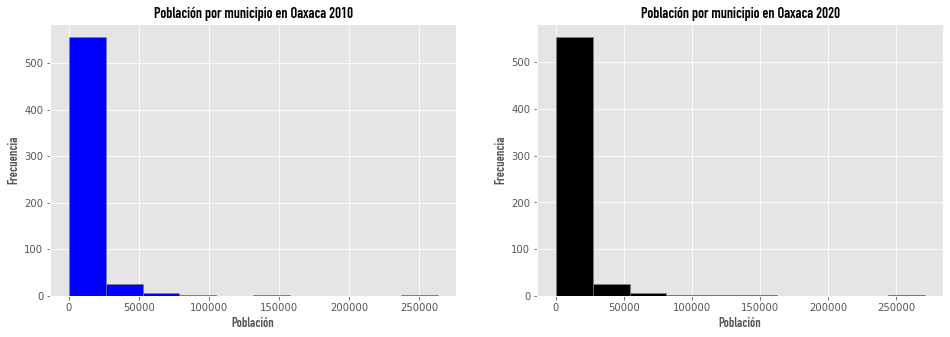

In [11]:
#Creamos los histogramas para vizualizar los datos de población de 2010 y 2020 por municipio en oaxaca

#Creamos la figura con el tamaño deseado
plt.figure(figsize = (16,5))

#Creamos el primer subplot
plt.subplot(1,2,1)
plt.hist(pobMunOax10, bins= nb10pob, color= 'blue',edgecolor= 'grey')
plt.title('Población por municipio en Oaxaca 2010', font= 'DIN Condensed', fontsize= '16')
plt.xlabel('Población', font= 'DIN Condensed', fontsize= '14')
plt.ylabel('Frecuencia', font= 'DIN Condensed', fontsize= '14')
plt.grid(True)

#Creamos el segundo subplot
plt.subplot(1,2,2)
plt.hist(pobMunOax20, bins= nb20pob, color= 'black',edgecolor= 'grey')
plt.title('Población por municipio en Oaxaca 2020', font= 'DIN Condensed', fontsize= '16')
plt.xlabel('Población', font= 'DIN Condensed', fontsize= '14')
plt.ylabel('Frecuencia', font= 'DIN Condensed', fontsize= '14')
plt.grid(True)

plt.show()

**Interpretación de los datos de población por municipio de 2010 y 2020**

Nuestros gráficos de frecuencias de los datos de 2010 y 2020 muestran un sesgo a la izquierda, por lo que podemos inferir que el grueso de los municipios de Oaxaca tienen poblaciones relativamente pequeñas en comparación a los mas densamente poblados. Esto también lo podemos corroborar al comparar la media con el valor máximo.

##### 2.2.2. Datos del área urbana por municipio en Oaxaca del 2010 y 2020 segun el marco geoestadítico nacional

In [12]:
#Definimos las varibles del área de los polígonos urbanos de 2010
areaUrb10 = pd.read_sql_query('''SELECT cve_mun, SUM(area_ha) AS area_ha FROM area_urb2010 GROUP BY cve_mun''',cnx)
#Definimos una variable que solo contenga la columna de area_ha
areaHa10 = areaUrb10.iloc[:,1]


#Definimos las variables del área de los polígonos urbanos de 2020
areaUrb20 = pd.read_sql_query('''SELECT cve_mun, SUM(area_ha) As area_ha FROM area_urb2020 GROUP BY cve_mun''',cnx)
#Definimos una variable que solo contenga la columna de area_ha
areaHa20 = areaUrb20.iloc[:,1]

#Variable que describe el tamaño de la muestra de área 2010
tmareaUrb10 = len(areaUrb10)

#Variable que describe el tamaño de la muestra de área 2010
tmareaUrb20 = len(areaUrb20)

In [13]:
#Visualizamos la estrutura de la tabla del área de los polígonos urbanos de 2010
areaUrb10.head()

,cve_mun,area_ha
0,537,156.51
1,354,26.70
2,497,280.62
3,551,776.07
4,065,332.01


In [14]:
#Visualizamos la estrutura de la tabla del área de los polígonos urbanos de 2020
areaUrb20.head()

,cve_mun,area_ha
0,537,179.170476
1,354,31.710374
2,497,280.685112
3,065,345.813458
4,551,866.360393


**Calculamos los valores estadisticos descriptivos básicos para ambos DataFrames**

In [15]:
#Describimos los valores estadísticos básicos de la tabla de área urbana por municipio en 2010
areaUrb10.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
area_ha,570.0,230.470263,381.536179,9.68,72.635,125.16,228.7075,4664.76


In [16]:
#Describimos los valores estadísticos básicos de la tabla de área urbana por municipio en 2020
areaUrb20.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
area_ha,570.0,250.605427,397.709808,9.680185,80.688598,144.088434,252.967779,4870.043746


**Uso de la función de Sturges**

In [17]:
#Utilizamos la función de Sturges para saber el numero de columnas que debe tener nuestro histograma de frecuencias
nb10area = int(sturgesRule(tmareaUrb10))
print('El número de columnas del histograma de los datos de población de 2010 es: ',nb10area)

nb20area = int(sturgesRule(tmareaUrb20))
print('El número de columnas del histograma de los datos de población de 2020 es: ',nb20area)

El número de columnas del histograma de los datos de población de 2010 es:  10
El número de columnas del histograma de los datos de población de 2020 es:  10


**Visualizamos los valores de los datos con histogramas para ver su tipo de distribución.**

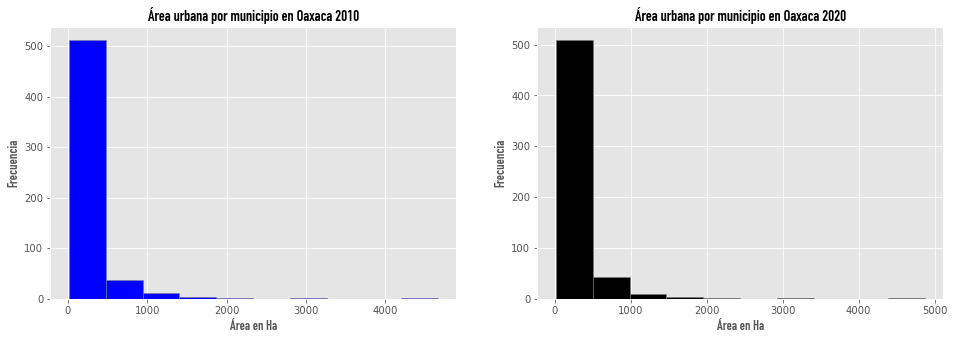

In [18]:
#Creamos los histogramas para vizualizar los datos de área urbana de 2010 y 2020 por municipio en Oaxaca
#Creamos la figura con el tamaño deseado
plt.figure(figsize = (16,5))

#Creación del primer subplot
plt.subplot(1,2,1)
plt.hist(areaHa10, bins= nb10area, color= 'blue',edgecolor= 'grey')
plt.title('Área urbana por municipio en Oaxaca 2010', font= 'DIN Condensed', fontsize= '16')
plt.xlabel('Área en Ha', font= 'DIN Condensed', fontsize= '14')
plt.ylabel('Frecuencia', font= 'DIN Condensed', fontsize= '14')
plt.grid(True) 

#Creación del segundo subplot
plt.subplot(1,2,2)
plt.hist(areaHa20, bins= nb20area, color= 'black',edgecolor= 'grey')
plt.title('Área urbana por municipio en Oaxaca 2020', font= 'DIN Condensed', fontsize= '16')
plt.xlabel('Área en Ha', font= 'DIN Condensed', fontsize= '14')
plt.ylabel('Frecuencia', font= 'DIN Condensed', fontsize= '14')
plt.grid(True)

plt.show()

**Interpretación de los datos de población total por municipio en Oaxaca 2010 y 2020**

Como ya sucedio en los gráficos de frecuencias de las variables anteriores los datos del área urbana también estan segados a la izquierda, esto nos demuestra que hay un corportamiento similar entre nuestras dos variables. En ambos casos la mayoría de los municipios tienes valores bajos en relación al máximo. Ahora queda por preguntarnos sí el crecimiento de amabas variables también tiene un conportamiento similar.

#### 2.3. Creación de los DataFrame necesario para el análisis

Para comenzar esta parte del ejercicio y responder a nuestras preguntas de investigación debemos crear un DataFrame que en dos variables contenga el cambio población de 2010 a 2020 y las relaciones con el cambio en el área urbana por municipio.

Para poder comparar de mejor manera estas variables las dos las transformaremos a porcentajes, que describirán el cambio ocurrido de los datos de 2010 a 2020. Con este cambio podremos responder de mejor manera si existe una relación entre el crecimiento de la población (%) y el crecimiento área urbana (%)en los últimos diez años los cuales abarca nuestro estudio.

Esta transformación de las variables nos permitirá trabajar con un plano bidimensional en lugar de uno tridimensional que resultaría de usar los valores absolutos de cada uno de los censos y aumentar los años del censo como tercera variable.

El DataFrame que construiremos debe contener los siguiente datos por municipio:

* Campos para identificar a cada uno de los municipios.
* Aumento o disminución de la población en porcentaje con respecto a los datos de 2010.
* Aumento o disminución de los áreas urbanas en porcentaje con respecto a los datos de 2010.

Está tabla la crearemos dentro de un gestor de base de datos con lenguaje SQL donde nos será mas fácil trabajar con los datos y utilizar datos geográficos dentro de las tablas.

##### 2.3.1. Construcción de la tabla en la base de datos para la corroboracion de la hipótesis

**Las consultas utilizadas para la creación del DataFrame son las siguientes**

/* AGRUPAR LOS DATOS DE ÁREA URBANA POR MUNICIPIO */

/* contar el área total urbana por municipio */

    SELECT cve_mun, SUM(area_ha) AS areatot_ha FROM area_urb2010
    GROUP BY cve_mun ORDER BY cve_mun ASC;

    SELECT cve_mun, SUM(area_ha) AS areatot_ha FROM area_urb2020
    GROUP BY cve_mun ORDER BY cve_mun ASC;

/* CREAR LA TABLA PARA COMPROVAR LA CORELACIÓN */

/* calcular la columna de porcentaje de crecimiento poblacional con respecto a 2010*/

    ALTER TABLE oax_pobtotmun ADD COLUMN difpob_porc decimal;

    UPDATE oax_pobtotmun SET difpob_porc = (pobtot2020-pobtot2010)*100/pobtot2010;

    UPDATE oax_pobtotmun SET difpob_porc = TRUNC(difpob_porc,3);

    SELECT* FROM oax_pobtotmun;

/* crear la tabla que contenga el nuevo dato por municipio para agregar los dos faltates
de área urbana y numero de localidades */

    CREATE TABLE regredatos_oax AS 
    SELECT id, geom, cve_mun, nom_mun, difpob_porc FROM oax_pobtotmun;

    SELECT * FROM regredatos_oax;

/* crear una tabla donde esten las áreas urbanas sumadas por municipio de 2010 */

    CREATE TABLE area_urb2010tot AS SELECT cve_mun, SUM(area_ha) AS areatot_ha FROM area_urb2010
    GROUP BY cve_mun;

    SELECT * FROM area_urb2010tot;

/* crear una tabla donde esten las áreas urbanas sumadas por municipio de 2020 */

    CREATE TABLE area_urb2020tot AS SELECT cve_mun, SUM(area_ha) AS areatot_ha20 FROM area_urb2020
    GROUP BY cve_mun;

    SELECT * FROM area_urb2020tot;

/* agregar columna de diferencia de área urbana 2010 */

    CREATE TABLE regredatos_urb AS SELECT rdo.*, au10.areatot_ha FROM regredatos_oax rdo
    INNER JOIN area_urb2010tot au10 ON rdo.cve_mun = au10.cve_mun;

    SELECT * FROM  regredatos_urb;

/* agregar columna de diferencia de área urbana 2020 */

    CREATE TABLE regredatos_urb3 AS SELECT rdo.*, au20.areatot_ha20 FROM regredatos_urb2 rdo
    INNER JOIN area_urb2020tot au20 ON rdo.cve_mun = au20.cve_mun;

    SELECT * FROM regredatos_urb3;

/* calcular la columna de porcentage de crecimiento poblacional con respecto a 2010*/

    ALTER TABLE regredatos_urb3 ADD COLUMN difareaurb_porc decimal;

    UPDATE regredatos_urb3 SET difareaurb_porc = (areaurb_ha20-areaurb_ha10)*100/areaurb_ha10;

    UPDATE regredatos_urb3 SET difareaurb_porc = TRUNC(difareaurb_porc,3);

    SELECT* FROM regredatos_urb3 ORDER BY difareaurb_porc ASC;

/* crear tabla en limpio para el análisis de la correlación lineal entre variables */

    CREATE TABLE regredatos AS
    SELECT id, geom, cve_mun, nom_mun, difpob_porc, difareaurb_porc 
    FROM regredatos_conjunto;

    SELECT * FROM regredatos;

#### 2.4. Análisis exploratorio de los datos del DataFrame

Para poder seguir con nuestro trabajo y que esté sea lo mas fácil posible es indispensable hacer un análisis exploratorio de nuestros datos (EDA). Este es un proceso consiste en entender de mejor manera el comportamiento de nuestros datos, su cuerpo, su distribución y las posibles relaciones entre variables. Dicho análisis se basa en gráficos y estadísticos que permiten explorar la distribución identificando características tales como: valores atípicos o outliers, saltos o discontinuidades, concentraciones de valores, forma de la distribución, etc. 

Primero llevaremos a caso una selección de únicamente los datos que nos son relevantes para el análisis, y dejaremos fuera campos como nombre del municipio, geometría, etc. que sirven para contextualizar mejor los datos de la tabla, pero no usaremos en este ejercicio.


**Crear un DataFrame con los datos que usaremos para el ejercicio**

In [19]:
#Creación de un DataFrame que una todas la variables que necesitamos para hacer el análisis de la correlación
tablaReg = pd.read_sql_query('''SELECT cve_mun, difpob_porc, difareaurb_porc FROM regredatos''',cnx)

#Definimos la variable 'x' y 'y' para nuestro plot
vx = pd.read_sql_query('''SELECT difpob_porc FROM regredatos''',cnx)
vy = pd.read_sql_query('''SELECT difareaurb_porc FROM regredatos''',cnx)

In [20]:
#Usamos la función head() para ver la estructura de la nueva tabla
tablaReg.head()

,cve_mun,difpob_porc,difareaurb_porc
0,021,-1.220,4.523
1,002,0.628,1.657
2,278,5.792,-38.189
3,406,4.299,8.271
4,184,2.366,0.397


El nuevo cuerpo de datos ahora contiene las dos nuevas variables de las cuales queremos estudiar su relación y una columna que nos permite identificar a cada uno de los registros con su municipio correspondiente. Nos referiremos a está tabla como tabla de correlación a partir de ahora.

**Estadística descriptiva de la muestra, cálculo de los valores estadísticos básicos**

En el caso de la estadística de análisis descriptivo, este tipo de metodología proporciona un enfoque por el que se confecciona un resumen de información que dan los datos de una muestra. Es decir, su meta es hacer síntesis de la información para arrojar precisión, sencillez y aclarar y ordenar los datos. 

In [21]:
#Calculo de los valores estadísticos básicos del nuevo DataFrame
tablaReg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
difpob_porc,590.0,4.237234,14.153368,-31.545,-3.107,3.1455,10.82375,113.309
difareaurb_porc,590.0,17.942390,76.253494,-82.875,0.004,3.8030,15.32300,1307.069


In [22]:
#Averiguamos si hay o no valores nulos en nuestro cuerpo de datos.
tablaReg.isnull().values.any()

False

En el caso de nuestra nueva tabla hay dos cosas que son particularmente importantes en nuestro cuerpo de datos que debemos analizar: 

La primera es el hecho de que existan valores nulos dentro de nuestra muestra, en este caso son municipios cuya área urbana no creció nada, aunque normalmente no se suele recomendar trabajar con valores nulos, los de nuestra tabla no son datos faltantes en sí (como demuestra nuestra función **isnull**), si no mas bien datos en donde nuestra variable es igual a 0 por lo qué no es ningún problema que los mantengamos en nuestra muestra. 

La segunda es que hay una gran diferencia entre el valor máximo y mínimo de nuestras variables y la media, lo que nos indica la posible existencia de valores atípicos en nuestros datos.

**Histograma de frecuencias de ambas variables de la taba de correlación**

Aunque ya utilizamos esta herramienta antes para visualizar los primeros datos que descargamos en esta ocasión me gustaría explicar cada de los tipos de gráficos que usaremos y sus utilidades, ya que son importantes herramientas durante el EDA.

El histograma de frecuencias es un gráfico básico en el análisis visual de los datos, y con el podemos evidenciar comportamientos, observar el grado de homogeneidad, acuerdo o diferencia entre los valores de todas las partes que componen la población o la muestra, o, en contraposición, poder observar el grado de variabilidad, y por ende, la dispersión de todos los valores que toman las partes.

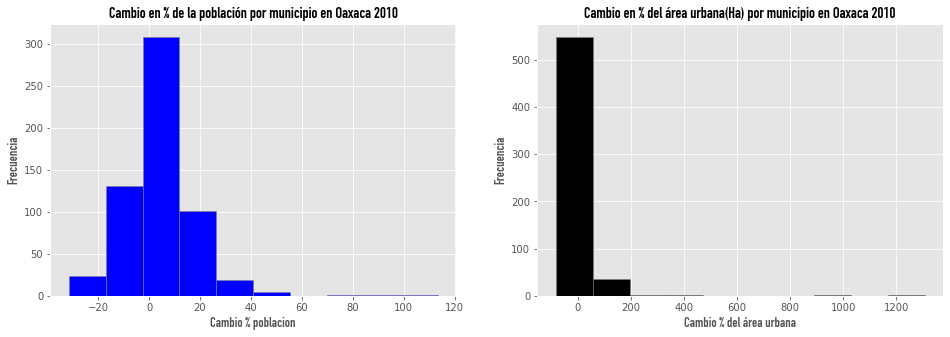

In [23]:
#Creamos los histogramas para vizualizar los número de localidades rurales de 2010 y 2020 por municipio en Oaxaca
#Creamos la figura con el tamaño deseado
plt.figure(figsize = (16,5))

#Creación del primer subplot
plt.subplot(1,2,1)
plt.hist(vx, bins=10, color='blue', edgecolor= 'grey')
plt.title('Cambio en % de la población por municipio en Oaxaca 2010', font= 'DIN Condensed', fontsize= '16')
plt.xlabel('Cambio % poblacion',font= 'DIN Condensed', fontsize= '14')
plt.ylabel('Frecuencia', font= 'DIN Condensed', fontsize= '14')

#Creación del segundo subplot
plt.subplot(1,2,2)
plt.hist(vy, bins=10,color='black',edgecolor= 'grey')
plt.title('Cambio en % del área urbana(Ha) por municipio en Oaxaca 2010',font= 'DIN Condensed', fontsize= '16')
plt.xlabel('Cambio % del área urbana', font= 'DIN Condensed', fontsize= '14')
plt.ylabel('Frecuencia', font= 'DIN Condensed', fontsize= '14')

plt.show()

**Interpretación de los gráficos de distribución**

Nuestros nuevos gráficos de distribución siguen estando sesgados a la derecha de la misma forma que lo estaban nuestros datos iniciales, pero la variable de crecimiento de población por municipio en Oaxaca muestra mas normalidad en su distribución.

#### 2.5. Detección y eliminación de valores atípicos en nuestra muestra

Los valores atípicos pueden ser causados por diversas razones y es deber del investigador averiguar esta información para su muestra. El como lidiar con estos datos dependerá de la pregunta de investigación, la metodología y la decisión subjetiva del investigador.

En este caso los outliers no se deben a errores en la captura de los datos, puesto que estos datos ya han sido revisados y corregidos por la fuente original, sin embargo, representan anormalidades en nuestra muestra que seguramente se deben a variables que no contemplamos en este análisis, por ello en este caso decidimos eliminarlos con el fin de que el análisis sea solo con el grueso de los datos que están mas cercanos a la media. Aunque es importante mencionar que está no es una buena manera de lidiar con ellos y lo mejor es probar otras aproximaciones o variables que describan mejor el fenómeno que estamos estudiando.  
 
* Valores atípicos

En estadística, un valor atípico (en inglés outlier) es una observación que es numéricamente distante del resto de los datos. Las estadísticas derivadas de los conjuntos de datos que incluyen valores atípicos serán frecuentemente engañosas.

* Lidiar con valores atípicos

Los outliers o valores atípicos los podemos categorizar en dos grupos, los valores atípicos leves y los valores atipicos extremos. La forma de calcular estos valores es a partir su relación con el valor del primer cuartil (Q1) y el tercer cuartil (Q3) y el rango intercuatílico el cual es la diferencia entre estos dos valores.

Rango en el que se encuentran los valores atípicos leves:

${min = Q1 - 1.5(RI)}$ 
    
${max = Q3 + 1.5(RI)}$

Rango en el que se encuantran los valores atípicos extremos:
    
${min = Q1 - 3*(RI)}$

${max = Q3 + 3*(RI})$

Para calcular el RI o rango intercuatílico usaremos la siguiente formula:

${RI = Q3 - Q1}$

##### 2.5.1. Identificar valores atípicos mediante gráficos

Como ya intuíamos mediante los gráficos de frecuencias contamos con varios valores atípicos que pueden afectar a nuestro estudio de forma negativa, por lo que es importante tratar los datos para sacarlos de nuestra muestra. A grandes rasgos hay dos maneras de lidiar con ellos: eliminarlos o cambiar su valor por uno que no se atípico. Nosotros los eliminaremos.

Para la identificación de los outliers hay varios tipos de datos que nos sirven, pero los mas usados y los mas comunes son:

* Boxplot: Este tipo de gráfico nos permite identificar valores atípicos y comparar distribuciones. Además de conocer de una forma cómoda y rápida como se distribuyen los datos con respecto a la mediana.

* Diagrama de dispersión: Un diagrama de dispersión o gráfica de dispersión o gráfico de burbujas es un tipo de diagrama matemático que utiliza las coordenadas cartesianas para mostrar los valores de dos variables para un conjunto de datos, este es utilizado principalmente para visualizar el tipo de relación entre nuestras variables, pero puede ser usado para identificar outliers también.

**Boxplot del cambio en % de la población por municipio en Oaxaca respecto al censo de 2010**

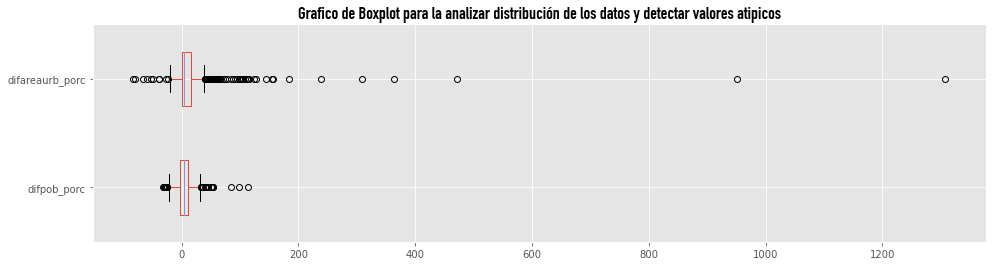

In [24]:
#Tamaño de la figura
plt.figure(figsize=(16,4))

#Configuración de los datos del contenido del plot
tablaReg.boxplot(vert=False,widths= .5)

#Configuración de los títulos, fuentes y marcadores
plt.title('Grafico de Boxplot para la analizar distribución de los datos y detectar valores atipicos',font= 'DIN Condensed', fontsize= '18')

plt.show()

**Interpretación de ambos BoxPlots**

Los dos Boxplots nos dejan ver claramente que ambas variables tienen valores atípicos, pero especialmente la de cambio en el porcentaje de área urbana por municipio. Usaremos ahora un diagrama de dispersión para visualizar estos valores atípicos con otra herramienta.

**Diagrama de dispersión de la variable cambio % de población y cambio % del área urbana (Ha) respecto al 2010 por municipio en Oaxaca**

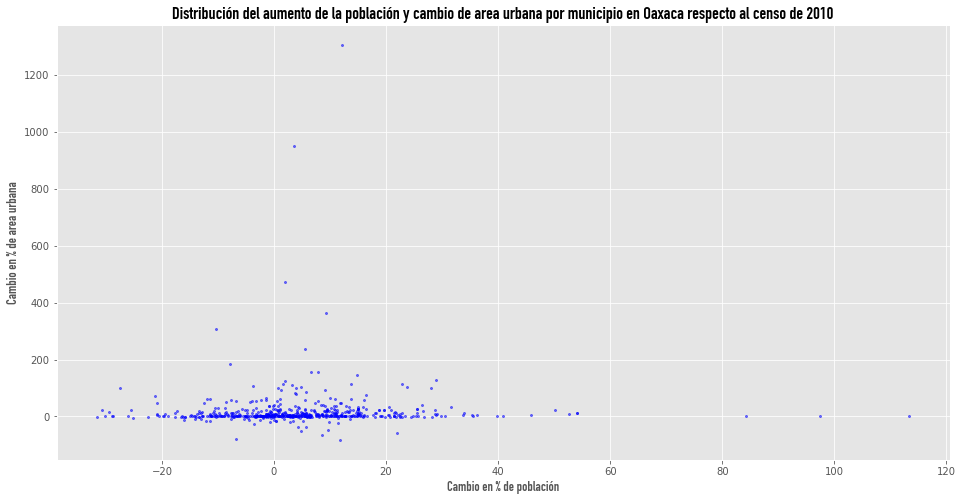

In [25]:
#Tamaño de la figura
plt.figure(figsize=(16,8))

#Configuración de los datos del contenido del plot
plt.plot(vx, vy,'bo',markersize = '2', alpha= 0.5)

#Configuración de los títulos, fuentes y marcadores
plt.xlabel('Cambio en % de población',font= 'DIN Condensed', fontsize= '14')
plt.ylabel('Cambio en % de area urbana',font= 'DIN Condensed', fontsize= '14')
plt.title('Distribución del aumento de la población y cambio de area urbana por municipio en Oaxaca respecto al censo de 2010', font= 'DIN Condensed', fontsize= '18')

plt.show()

**Interpretación del diagrama de dispersión**

En nuestro caso nos este gráfico nos resulta especialmente útil, ya que nos confirma que existen estos valores atípicos en nuestra muestra y además nos deja ver que posiblemente hay una correlación lineal entre nuestras variables, pero solo lo sabremos si eliminamos estos outliers. Para hacer esto seguiremos los pasos de la siguiente sección.

##### 2.5.2. Definición de los rangos para eliminar de los outliers del Dataframe

In [26]:
#Definir las variables para eliminar los outliers

#Cuartiles y rango intencuartílico de la variable difpob_porc
pobQ1 = tablaReg['difpob_porc'].quantile(0.25)
pobQ3 = tablaReg['difpob_porc'].quantile(0.75)
pobRI = pobQ3-pobQ1

#Definición de las variables que delimitan el rango de para detectar los valores atípicos extremos de difpob_porc
pobMinVal = pobQ1-1.5*pobRI
pobMaxVal = pobQ3+1.5*pobRI
print('PobMin: ',pobMinVal)
print('PobMax: ',pobMaxVal)

#Cuartiles y rango intencuartilico de la variable difareaurb_porc
aUrbQ1 = tablaReg['difareaurb_porc'].quantile(0.25)
aUrbQ3 = tablaReg['difareaurb_porc'].quantile(0.75)
aUrbRI = pobQ3-pobQ1

#Definición de las variables que delimitan el rango de para detectar los valores atípicos extremos de difareaurb_porc
aUrbMinVal = aUrbQ1-1.5*aUrbRI
aUrbMaxVal = aUrbQ3+1.5*aUrbRI
print('aUrbMin: ',aUrbMinVal)
print('aUrbMax:', aUrbMaxVal)

PobMin:  -24.003124999999997
PobMax:  31.719875
aUrbMin:  -20.892124999999997
aUrbMax: 36.219125


**Eliminamos los oitliers creando un nuevo Dataframe**

In [27]:
#Eliminar los outliners de la nuestro data frame.

#Eliminamos los datos que estan en el rango de los valores atípicos leves y extremos del campo de difpob_porc 
datosReg1 = tablaReg[(tablaReg.difpob_porc>pobMinVal)&(tablaReg.difpob_porc<pobMaxVal)]
#Eliminamos los datos que estan en el rango de los valores atípicos leves y extremos del campo de difareaurb_porc
datosReg = datosReg1[(datosReg1.difareaurb_porc>aUrbMinVal)&(datosReg1.difareaurb_porc<aUrbMaxVal)]

**Calculos de los valores estadísticos descriptivos básicos**

In [28]:
#Calculamos los valores estadísticos basicos del nuevo DataFrame sin valores atipicos leves y extremos
datosReg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
difpob_porc,489.0,3.322736,10.506669,-22.416,-3.053,2.798,10.244,31.667
difareaurb_porc,489.0,5.818088,9.413755,-20.840,0.002,2.652,9.635,35.221


**Interpretación de la nueva muestra de datos**

Es evidente que hemos logrado lo que queríamos, podemos observar que la media, los valores máximos y los valores mínimos están mucho mas cerca que antes y ninguno excede el rango que delimitamos para eliminar valores atípicos. Aunque también hemos tenido una reducción de 101 registros.

##### 2.5.3. Visualización e interpretación del nuevo cuerpo de datos

**Boxplot**

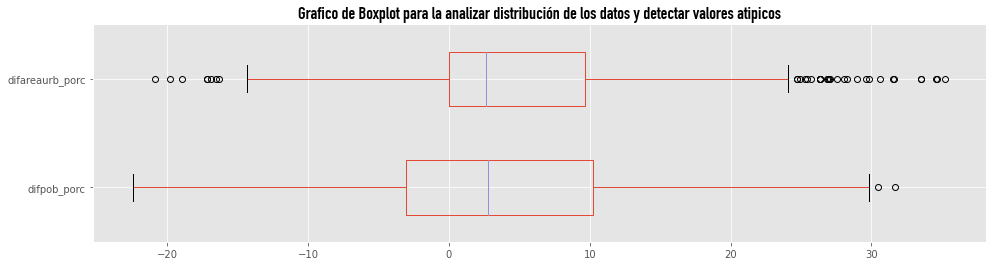

In [29]:
#Tamaño de la figura
plt.figure(figsize=(16,4))

#Configuración de los datos del contenido del plot
datosReg.boxplot(vert=False,widths= .5)

#Configuración de los titulos, fuentes y marcadores
plt.title('Grafico de Boxplot para la analizar distribución de los datos y detectar valores atipicos',font= 'DIN Condensed', fontsize= '18')

plt.show()

**Interpretación de los Boxplot nuevos**

Ambos gráficos nos corroboran que los valores atípicos se han reducido considerablemente y ahora la muestra de datos es muchos mas homogenea que antes.

**Histograma de Frecuencias**

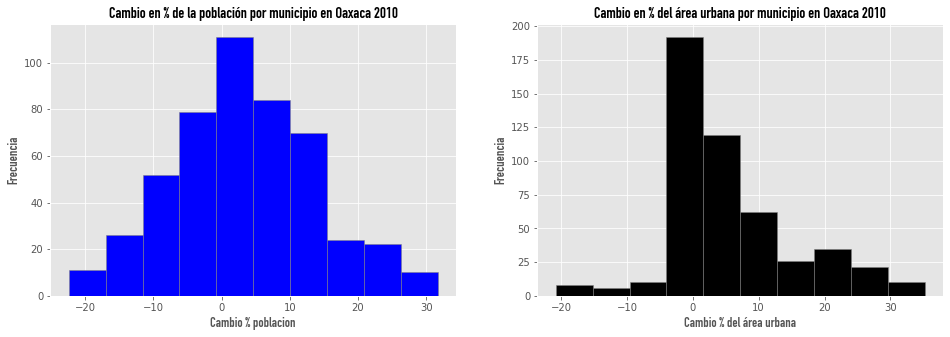

In [30]:
#Creamos los histogramas para vizualizar los número de localidades rurales de 2010 y 2020 por municipio en Oaxaca
#Creamos la figura con el tamaño deseado
plt.figure(figsize = (16,5))

#Creación del primer subplot
plt.subplot(1,2,1)
plt.hist(datosReg['difpob_porc'], bins=10, color='blue',edgecolor= 'grey')
plt.title('Cambio en % de la población por municipio en Oaxaca 2010', font= 'DIN Condensed', fontsize= '16')
plt.xlabel('Cambio % poblacion',font= 'DIN Condensed', fontsize= '14')
plt.ylabel('Frecuencia',font= 'DIN Condensed', fontsize= '14')

#Creación del segundo subplot
plt.subplot(1,2,2)
plt.hist(datosReg['difareaurb_porc'], bins=10,color='black',edgecolor= 'grey')
plt.title('Cambio en % del área urbana por municipio en Oaxaca 2010', font= 'DIN Condensed', fontsize= '16')
plt.xlabel('Cambio % del área urbana',font= 'DIN Condensed', fontsize= '14')
plt.ylabel('Frecuencia',font= 'DIN Condensed', fontsize= '14')

plt.show()

**Interpretación de los nuevos histogramas**

También podemos ver que las distribuciones de nuestros datos son mas normales que antes, por lo qué la posibilidad de encontrar un correlación lineal entre nuestras variables es mayor que antes.

**Diagrama de dispersión**

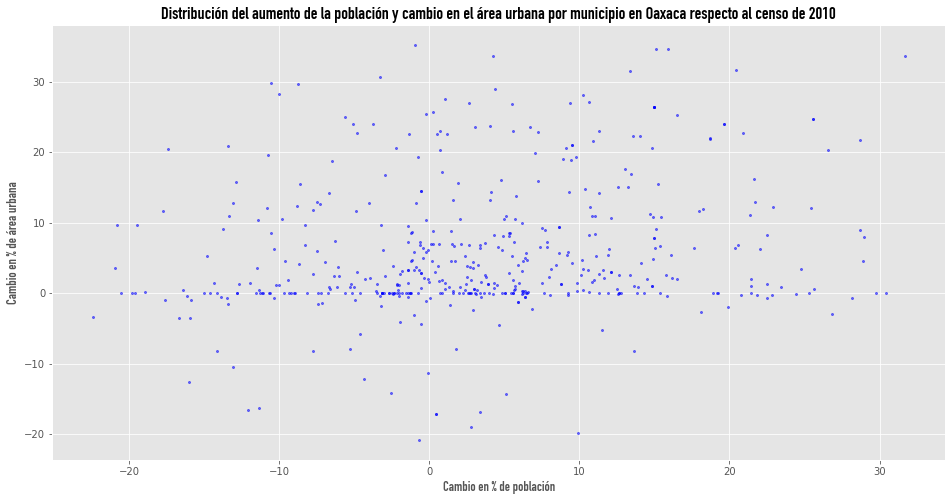

In [31]:
#Tamaño de la figura
plt.figure(figsize=(16,8))

#Configuración de los datos del contenido del plot
plt.plot(datosReg['difpob_porc'], datosReg['difareaurb_porc'],'bo',markersize = '2', alpha = 0.5)

#Configuración de los títulos, fuentes y marcadores
plt.xlabel('Cambio en % de población',font= 'DIN Condensed', fontsize= '14')
plt.ylabel('Cambio en % de área urbana',font= 'DIN Condensed', fontsize= '14')
plt.title('Distribución del aumento de la población y cambio en el área urbana por municipio en Oaxaca respecto al censo de 2010', font= 'DIN Condensed', fontsize= '18')

plt.show()

**Interpretación de el nuevo diagrama de dispersión**

El nuevo diagrama de dispersión no es alentador para nuestra hipótesis ya que los datos se muestran dispersos de tal forma que la posible correlación lineal entre variables será poco explicativa para nuestros datos, sin embargo, esto no lo podemos corroborar hasta no calcular el coeficiente de correlación de Pearson entre ambas variables, y saber de forma exacta que tan linealmente relacionadas están. 

#### 2.6. Calculo del coeficiente de correlación de Pearson

En estadística, el coeficiente de correlación de Pearson es una medida de dependencia lineal entre dos variables aleatorias cuantitativas. A diferencia de la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables.

De manera menos formal, podemos definir el coeficiente de correlación de Pearson como un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas y continuas.

\begin{equation} 
r = frac{Nsum{XY}-(sum{X}sum{Y})}{sqrt{ [N sum{x^2}-(sum{x})^2 ][N sum{y^2}-(sum{y})^2 }]} 
\end{equation}

Usaremos la libreria sklearn que nos evita el trabajo de tenerque crear una funcion propia dentro de python.

In [32]:
#Definimos las variables X, Y para el modelo
x = datosReg['difpob_porc']
y = datosReg['difareaurb_porc']

In [33]:
#Calculo de coeficiente de correlación lineal
corrTest = pearsonr(x, y)
print('El coeficiente de correlacion de Pearson es: ',corrTest[0])

El coeficiente de correlacion de Pearson es:  0.20015350421906608


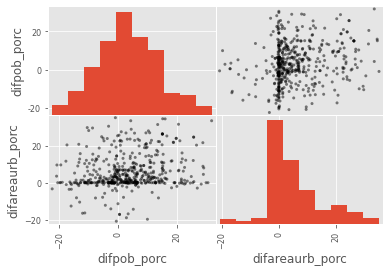

In [34]:
#Visualización de de las variables sus distribuciones y sus dispersiones
scatter_matrix(datosReg, alpha=0.5, color= 'black')
plt.show()

##### 2.6.1 Interpretación de los resultados

Debido a que el coeficiente de correlación es muy bajo (0.20 de 1) queda demostrado que la correlación lineal entre datos es muy débil o no existe, incluso habiendo quitado los outliers de nuestro conjunto la correlación entre el porcentaje de crecimiento de la población y el crecimiento del área urbana en nuestro caso de estudio no es lo suficientemente fuerte como para que sea un factor a tomar en cuenta por lo que nuestra hipótesis queda descartada. 

Aun así, continuaremos con el ejercicio a modo de práctica para crear el modelo que pueda predecir el comportamiento de nuestros datos, pero se debe saber que este modelo no suele ser muy preciso cuando el coeficiente de correlación tiene un valor tan bajo como el obtenido.

#### 2.7. Modelo de regresión Lineal

Continuando con lo que resta del ejercicio pretenderemos que la correlación lineal entre nuestras variables es lo suficientemente fuerte como para ser un factor a tomar en cuenta, un paso a siguiente sería utilizar un modelo estadístico que nos ayude a reproducir está relación entre variables con el fin de predecir valores.

Para esto podemos utilizar la regresión lineal la cual es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.

* Regresión lineal simple

Este modelo sólo está conformado por dos variables estadísticas llamadas ${\displaystyle X}$ y ${\displaystyle Y}$. Para la regresión lineal simple, se asume que ${\displaystyle X}$ y ${\displaystyle Y}$ se relacionan mediante la relación funcional

\begin{equation}
{Y}_i = {\beta}_0 + {\beta}_1 X_i + {\epsilon}_i
\end{equation}

**Variables necesarias para crear el modelo de regresión lineal**

In [35]:
#Calculo de las variables necesarias para la función de regresión lineal simple
Xarray = np.array(x)
Yarray = np.array(y)

#Definimos una variable que contenga la función
regLineal = LinearRegression()

#Instruimos a la regresión lineal que aprenda los datos de x,y. A la variable x debemos aplicarle una trasformación en su forma para que esto funcione
regLineal.fit(Xarray.reshape(-1,1),Yarray)

LinearRegression()

**Creamos el modelo e ingresamos nuestras datos dentro para entrenarlo**

In [36]:
#Creamos un data set mas pequeño para la implementación y entrenamiento del modelo.abs
x_train, x_test, y_train, y_test = train_test_split(Xarray, Yarray, test_size = 1/3)

#Aplicamos a los dato de test la función de regresión lineal
regLineal.fit(x_train.reshape(-1,1),y_train)

#Entrenamiento del modelo de regresión lineal
y_pred = regLineal.predict(y_test.reshape(-1,1))

#Predecimos los volores a través del entremamiento
pred_entrenamiento = regLineal.predict(Xarray.reshape(-1,1))

In [37]:
#Imprimimos el coeficiente y el intecepto de nuestra función de regresión lineal
print('Coeficiente de variación = ' + str(regLineal.coef_) + ' Intercepto con X = ' + str(regLineal.intercept_))

Coeficiente de variación = [0.19736662] Intercepto con X = 5.446577869639034


##### 2.7.1. Calculo del error del modelo de regresión

El Error Cuadrático Medio es el criterio de evaluación más usado para problemas de regresión. Se usa sobre todo cuando usamos aprendizaje automático supervisado. Para cada dato histórico podremos indicar el resultado correcto.

In [38]:
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = pred_entrenamiento)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 85.01126896159943
Raíz del Error Cuadrático Medio (RMSE) = 9.220155582288156


##### 2.7.2. Visualización del modelo de regresión

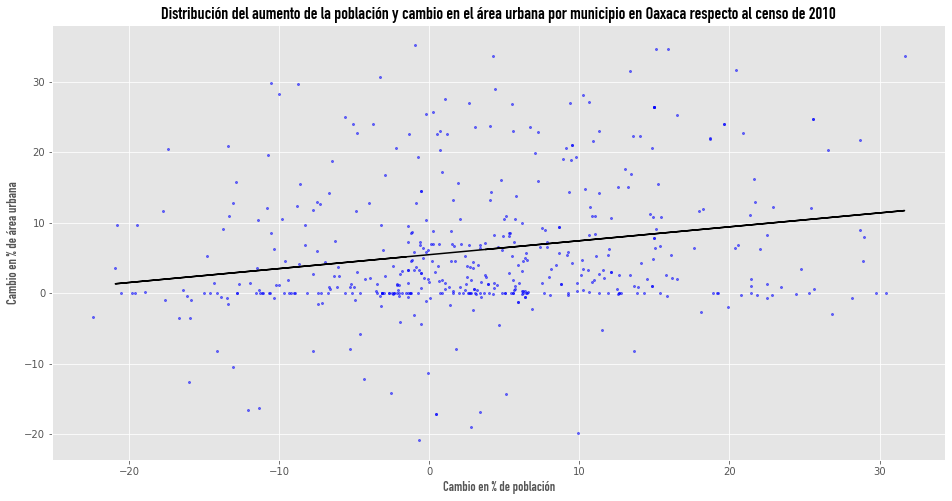

In [39]:
#Tamaño de la figura
plt.figure(figsize=(16,8))

#Configuración de los datos del contenido del plot
plt.plot(datosReg['difpob_porc'], datosReg['difareaurb_porc'],'bo',markersize = '2', alpha = 0.5)

#Plot con los datos del modelo ya entrenado para visualizar la recta que dibuja la regresión 
plt.plot(x_train, regLineal.predict(x_train.reshape(-1,1)), color = "black")

#Configuración de los títulos, fuentes y marcadores
plt.xlabel('Cambio en % de población',font= 'DIN Condensed', fontsize= '14')
plt.ylabel('Cambio en % de área urbana',font= 'DIN Condensed', fontsize= '14')
plt.title('Distribución del aumento de la población y cambio en el área urbana por municipio en Oaxaca respecto al censo de 2010', font= 'DIN Condensed', fontsize= '18')

plt.show()

**Interpretación del modelo de regresión lineal**

Nuestro modelo de regresión nos arroja un error medio muy alto, cosa que podemos ver en la gráfica de dispersión, la línea que dibuja la función de regresión dista de muchos puntos en el plano. Como ya predecíamos este modelo no nos es útil para predecir el comportamiento de nuestra variable de crecimiento del área urbana.

### 3. Conclusiones

Finalmente queda demostrado que nuestra hipótesis inicial no es correcta y que el crecimiento de la población no esta relacionado con el crecimiento del área urbana de forma lineal. Esto puede ser porqué ambas variables describen fenomenos tan que se ven afectados por muchos otros factores además de los que analizamos. Sabemos que los fenomenos demográficos de cualquier territorio son siempre complejos y es difícil encontrar con correlaciones que se puedan explicar de forma lineal.

También sabemos que el modelo lineal es tal vez la forma mas sencilla en la que se pueden relacionar dos variables y por la tanto es su utilidad tiene limitaciones importantes a la hora describir la realidad, pero este ejercicio nos ha dejado ver como aplicar y desarrollar una investigación desde el análisis cuantitativo y para ello aprendimos la utilidad de algunas herramientas y conceptos de la estadística y sus limitaciones a la hora de ser aplicadas. 

El que nuestra hipótesis sea negativa invita a explorar nuevas aproximaciones a este problema, por ejemplo, si hubiéramos trabajado a escala nacional ¿Los resultados serian similares? ¿Que otras variables podríamos agregar a nuestro modelo que ayuden a encontrar relaciones mas fuertes? ¿Que pasaría si ampliamos el periodo de tiempo de nuestro estudio? ¿Si no es el crecimiento de la población la que afecta al crecimiento del área urbana por que razones está aunmenta?. Estas preguntas son consecuencia de entender de mejor manera las herramientas de análisis que tenemos disponibles y plantearse otras formas de aproximarse a la cuestión.

### 4. Bibliografía

* INEGI (2010), [Marco Geoestadístico 2010 versión 4.3 (Censo de Población y Vivienda 2010)
]. Recuperado de: https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825296520

* INEGI (2020), [Marco Geoestadístico. Censo de Población y Vivienda 2020]. Recuperado de: https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463807469

* INEGI (2010), [Censo de Población y Vivienda 2010]. Recuperado de: https://www.inegi.org.mx/programas/ccpv/2010/

* INEGI (2020), [Censo de Población y Vivienda 2020]. Recuperdo de: https://www.inegi.org.mx/programas/ccpv/2020/#Microdatos

* Banco Mundial (2019), [Crecimiento de la población urbana (% anual) - México]. Recuperado de: https://datos.bancomundial.org/indicador/SP.URB.GROW?end=2019&locations=MX&start=1961&view=chart

* CONAPO (2020), [Indicadores demográficos de la República Mexicana, en el año 2020]. Recuperado de: http://www.conapo.gob.mx/work/models/CONAPO/Mapa_Ind_Dem18/index_2.html
